INSTALLING REQUIRED PACKAGES...
✓ pandas is already installed
✓ numpy is already installed
✓ matplotlib is already installed
✓ seaborn is already installed
✓ scipy is already installed

IMPORTING LIBRARIES...
✓ All libraries imported successfully!

THE GAMBIA CEREAL YIELD ANALYSIS
Business Analytics Project - Milestone 1

1. LOADING DATASET
-------------------------
✓ Dataset loaded successfully!
✓ Shape: (62, 2)
✓ Columns: ['Year', 'Cereal_Yield_kg_per_hectare']
✓ Year range: 1961 to 2022
✓ Total years of data: 62

First 5 rows:
   Year  Cereal_Yield_kg_per_hectare
0  1961                       1075.3
1  1962                       1080.5
2  1963                       1039.0
3  1964                       1087.7
4  1965                       1064.0

Last 5 rows:
    Year  Cereal_Yield_kg_per_hectare
57  2018                        536.8
58  2019                        461.4
59  2020                        656.3
60  2021                       1056.8
61  2022                        929.6


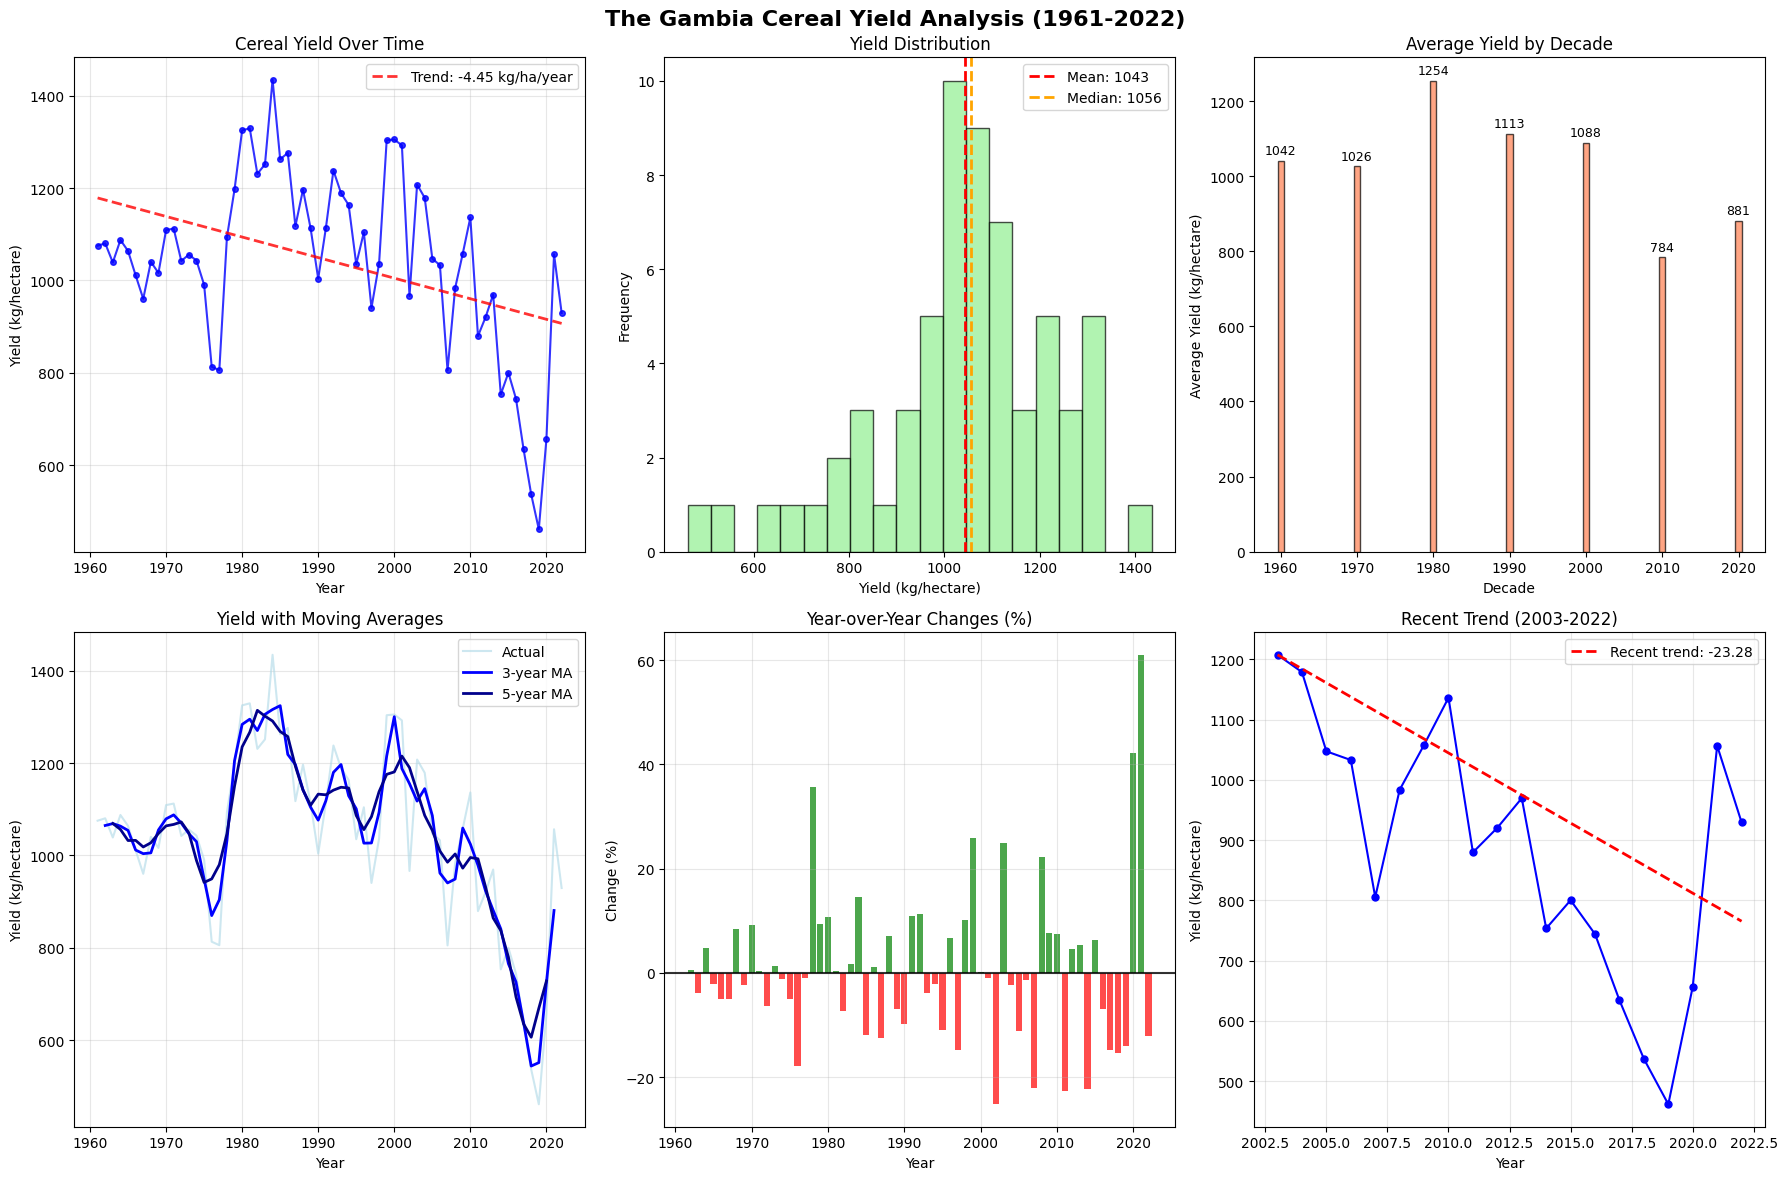

✓ All visualizations created successfully!

9. EXPORTING RESULTS
------------------------------
✓ Enhanced dataset saved: 'gambia_cereal_yield_final_analysis.csv'

ANALYSIS COMPLETE - KEY FINDINGS
 DATASET OVERVIEW:
   • 62 years of data (1961-2022)
   • 100% data completeness
   • Clean, analysis-ready dataset

 YIELD PERFORMANCE:
   • Average yield: 1042.9 kg/hectare
   • Best year: 1984 (1434.5 kg/ha)
   • Worst year: 2019 (461.4 kg/ha)
   • Variability: 18.7% coefficient of variation

 TREND ANALYSIS:
   • Overall trend: -4.45 kg/ha per year (Declining)
   • Recent trend (2003-2022): -23.28 kg/ha per year (Declining)
   • Total change over 61 years: -271.7 kg/ha

 DATA READY FOR:
   • Statistical modeling
   • Time series forecasting
   • Comparative analysis
   • Business intelligence reporting

 FILES CREATED:
   • gambia_cereal_yield_final_analysis.csv
   • Complete visualizations

SUCCESS! Your analysis is complete.


In [8]:
# The Gambia Cereal Yield Analysis 

import sys
import subprocess
import os

# This will install packages and run the full analysis
def install_and_import(package):
    """Install package if not available and import it"""
    try:
        __import__(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} installed successfully")

# Install required packages
print("INSTALLING REQUIRED PACKAGES...")
print("="*40)

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy']
for package in packages:
    install_and_import(package)

print("\nIMPORTING LIBRARIES...")
print("="*25)

# Now import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("✓ All libraries imported successfully!")

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("\n" + "="*60)
print("THE GAMBIA CEREAL YIELD ANALYSIS")
print("Business Analytics Project - Milestone 1")
print("="*60)

try:

    # 1. DATA LOADING

    
    print("\n1. LOADING DATASET")
    print("-" * 25)
    
    # Load the cleaned dataset
    df = pd.read_csv('Cleaned_Cereal_Yield_Gambia.csv')
    
    print(f"✓ Dataset loaded successfully!")
    print(f"✓ Shape: {df.shape}")
    print(f"✓ Columns: {list(df.columns)}")
    print(f"✓ Year range: {df['Year'].min()} to {df['Year'].max()}")
    
    print(f"✓ Total years of data: {len(df)}")
    
    # Display first and last few rows
    print(f"\nFirst 5 rows:")
    print(df.head())
    print(f"\nLast 5 rows:")
    print(df.tail())
    

    # 2. DATA QUALITY CHECK

    
    print(f"\n2. DATA QUALITY ASSESSMENT")
    print("-" * 35)
    
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Duplicate rows: {df.duplicated().sum()}")
    print(f"Data types:")
    print(df.dtypes)
    
    # Check for any anomalies
    print(f"\nData validation:")
    print(f"✓ All years are integers: {df['Year'].dtype}")
    print(f"✓ All yields are numeric: {df['Cereal_Yield_kg_per_hectare'].dtype}")
    print(f"✓ No negative yields: {(df['Cereal_Yield_kg_per_hectare'] < 0).sum() == 0}")
    

    # 3. DESCRIPTIVE STATISTICS

    
    print(f"\n3. DESCRIPTIVE STATISTICS")
    print("-" * 35)
    
    stats_summary = df['Cereal_Yield_kg_per_hectare'].describe()
    print("Cereal Yield Statistics (kg per hectare):")
    print(stats_summary.round(2))
    
    # Additional statistics
    mean_yield = stats_summary['mean']
    std_yield = stats_summary['std']
    cv = (std_yield / mean_yield) * 100
    
    print(f"\nAdditional Metrics:")
    print(f"Coefficient of Variation: {cv:.2f}%")
    print(f"Range: {stats_summary['max'] - stats_summary['min']:.2f} kg/ha")
    print(f"Interquartile Range: {stats_summary['75%'] - stats_summary['25%']:.2f} kg/ha")
    

    # 4. TREND ANALYSIS

    
    print(f"\n4. TREND ANALYSIS")
    print("-" * 25)
    
    # Linear regression for trend
    years = df['Year'].values
    yields = df['Cereal_Yield_kg_per_hectare'].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, yields)
    
    print(f"Linear Trend Analysis:")
    print(f"  Slope: {slope:.3f} kg/ha per year")
    print(f"  Intercept: {intercept:.2f}")
    print(f"  R-squared: {r_value**2:.4f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Trend significance: {'Significant' if p_value < 0.05 else 'Not significant'}")
    print(f"  Direction: {'Declining' if slope < 0 else 'Increasing'}")
    
    # Calculate total change over the period
    total_change = slope * (years[-1] - years[0])
    print(f"  Total change over period: {total_change:.1f} kg/ha")
    

    # 5. PERIOD ANALYSIS

    
    print(f"\n5. PERIOD ANALYSIS")
    print("-" * 25)
    
    # Decade analysis
    df['Decade'] = (df['Year'] // 10) * 10
    decade_stats = df.groupby('Decade')['Cereal_Yield_kg_per_hectare'].agg(['mean', 'std', 'count']).round(2)
    
    print("Decade Statistics:")
    print(decade_stats)
    
    # Find best and worst years
    best_year = df.loc[df['Cereal_Yield_kg_per_hectare'].idxmax()]
    worst_year = df.loc[df['Cereal_Yield_kg_per_hectare'].idxmin()]
    
    print(f"\nExtreme Years:")
    print(f"Best yield: {best_year['Year']:.0f} with {best_year['Cereal_Yield_kg_per_hectare']:.1f} kg/ha")
    print(f"Worst yield: {worst_year['Year']:.0f} with {worst_year['Cereal_Yield_kg_per_hectare']:.1f} kg/ha")
    

    # 6. FEATURE ENGINEERING

    
    print(f"\n6. FEATURE ENGINEERING")
    print("-" * 30)
    
    # Create new features
    df_enhanced = df.copy()
    
    # Moving averages
    df_enhanced['MA_3yr'] = df_enhanced['Cereal_Yield_kg_per_hectare'].rolling(window=3, center=True).mean()
    df_enhanced['MA_5yr'] = df_enhanced['Cereal_Yield_kg_per_hectare'].rolling(window=5, center=True).mean()
    
    # Year-over-year changes
    df_enhanced['Yield_Change'] = df_enhanced['Cereal_Yield_kg_per_hectare'].diff()
    df_enhanced['Yield_Change_Pct'] = df_enhanced['Cereal_Yield_kg_per_hectare'].pct_change() * 100
    
    # Standardized scores
    df_enhanced['Yield_Zscore'] = (df_enhanced['Cereal_Yield_kg_per_hectare'] - mean_yield) / std_yield
    
    # Categories
    df_enhanced['Above_Average'] = df_enhanced['Cereal_Yield_kg_per_hectare'] > mean_yield
    df_enhanced['Yield_Category'] = pd.cut(df_enhanced['Cereal_Yield_kg_per_hectare'], 
                                          bins=3, labels=['Low', 'Medium', 'High'])
    
    # Performance indicators
    df_enhanced['Decade_Avg'] = df_enhanced.groupby('Decade')['Cereal_Yield_kg_per_hectare'].transform('mean')
    df_enhanced['Above_Decade_Avg'] = df_enhanced['Cereal_Yield_kg_per_hectare'] > df_enhanced['Decade_Avg']
    
    print("Features created:")
    print("✓ 3-year and 5-year moving averages")
    print("✓ Year-over-year changes (absolute and percentage)")
    print("✓ Standardized z-scores")
    print("✓ Above-average indicators")
    print("✓ Yield categories (Low/Medium/High)")
    print("✓ Decade performance indicators")
    
    # Category distribution
    category_counts = df_enhanced['Yield_Category'].value_counts()
    print(f"\nYield Category Distribution:")
    for cat in ['Low', 'Medium', 'High']:
        if cat in category_counts.index:
            count = category_counts[cat]
            pct = (count / len(df_enhanced)) * 100
            print(f"  {cat}: {count} years ({pct:.1f}%)")
    

    # 7. VOLATILITY ANALYSIS

    
    print(f"\n7. VOLATILITY ANALYSIS")
    print("-" * 30)
    
    # Find periods of high volatility
    volatility = df_enhanced['Yield_Change_Pct'].abs()
    high_volatility = df_enhanced[volatility > volatility.quantile(0.9)]
    
    print(f"High volatility years (top 10%):")
    for _, row in high_volatility.iterrows():
        if pd.notna(row['Yield_Change_Pct']):
            print(f"  {row['Year']:.0f}: {row['Yield_Change_Pct']:.1f}% change")
    
    # Recent trend (last 20 years)
    recent_data = df_enhanced[df_enhanced['Year'] >= 2003]
    recent_slope, _, recent_r2, recent_p, _ = stats.linregress(recent_data['Year'], recent_data['Cereal_Yield_kg_per_hectare'])
    
    print(f"\nRecent Trend (2003-2022):")
    print(f"  Slope: {recent_slope:.3f} kg/ha per year")
    print(f"  R-squared: {recent_r2:.4f}")
    print(f"  Direction: {'Declining' if recent_slope < 0 else 'Increasing'}")
    

    # 8. VISUALIZATIONS

    
    print(f"\n8. CREATING VISUALIZATIONS")
    print("-" * 35)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('The Gambia Cereal Yield Analysis (1961-2022)', fontsize=16, fontweight='bold')
    
    # Plot 1: Time series with trend
    axes[0, 0].plot(df['Year'], df['Cereal_Yield_kg_per_hectare'], 'b-o', markersize=4, linewidth=1.5, alpha=0.8)
    axes[0, 0].plot(df['Year'], slope * df['Year'] + intercept, 'r--', linewidth=2, alpha=0.8, 
                    label=f'Trend: {slope:.2f} kg/ha/year')
    axes[0, 0].set_title('Cereal Yield Over Time')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Yield (kg/hectare)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    
    # Plot 2: Distribution
    axes[0, 1].hist(df['Cereal_Yield_kg_per_hectare'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].axvline(mean_yield, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_yield:.0f}')
    axes[0, 1].axvline(df['Cereal_Yield_kg_per_hectare'].median(), color='orange', linestyle='--', linewidth=2, 
                       label=f'Median: {df["Cereal_Yield_kg_per_hectare"].median():.0f}')
    axes[0, 1].set_title('Yield Distribution')
    axes[0, 1].set_xlabel('Yield (kg/hectare)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    
    # Plot 3: Decade comparison
    decade_means = df.groupby('Decade')['Cereal_Yield_kg_per_hectare'].mean()
    bars = axes[0, 2].bar(decade_means.index, decade_means.values, alpha=0.7, color='coral', edgecolor='black')
    axes[0, 2].set_title('Average Yield by Decade')
    axes[0, 2].set_xlabel('Decade')
    axes[0, 2].set_ylabel('Average Yield (kg/hectare)')
    
    # Add value labels on bars
    for bar, value in zip(bars, decade_means.values):
        axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                        f'{value:.0f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 4: Moving averages
    axes[1, 0].plot(df_enhanced['Year'], df_enhanced['Cereal_Yield_kg_per_hectare'], 'lightblue', alpha=0.6, label='Actual')
    axes[1, 0].plot(df_enhanced['Year'], df_enhanced['MA_3yr'], 'blue', linewidth=2, label='3-year MA')
    axes[1, 0].plot(df_enhanced['Year'], df_enhanced['MA_5yr'], 'darkblue', linewidth=2, label='5-year MA')
    axes[1, 0].set_title('Yield with Moving Averages')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (kg/hectare)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 5: Year-over-year changes
    valid_changes = df_enhanced.dropna(subset=['Yield_Change_Pct'])
    colors = ['red' if x < 0 else 'green' for x in valid_changes['Yield_Change_Pct']]
    axes[1, 1].bar(valid_changes['Year'], valid_changes['Yield_Change_Pct'], color=colors, alpha=0.7)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.8)
    axes[1, 1].set_title('Year-over-Year Changes (%)')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Change (%)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Plot 6: Recent trend focus
    recent_years = df[df['Year'] >= 2003]
    axes[1, 2].plot(recent_years['Year'], recent_years['Cereal_Yield_kg_per_hectare'], 'bo-', markersize=5)
    axes[1, 2].plot(recent_years['Year'], recent_slope * recent_years['Year'] + 
                    (recent_data['Cereal_Yield_kg_per_hectare'].iloc[0] - recent_slope * recent_data['Year'].iloc[0]), 
                    'r--', linewidth=2, label=f'Recent trend: {recent_slope:.2f}')
    axes[1, 2].set_title('Recent Trend (2003-2022)')
    axes[1, 2].set_xlabel('Year')
    axes[1, 2].set_ylabel('Yield (kg/hectare)')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ All visualizations created successfully!")
    

    # 9. EXPORT RESULTS

    
    print(f"\n9. EXPORTING RESULTS")
    print("-" * 30)
    
    # Save enhanced dataset
    df_enhanced.to_csv('gambia_cereal_yield_final_analysis.csv', index=False)
    print("✓ Enhanced dataset saved: 'gambia_cereal_yield_final_analysis.csv'")
    

    # 10. FINAL SUMMARY

    
    print(f"\n{'='*60}")
    print("ANALYSIS COMPLETE - KEY FINDINGS")
    print(f"{'='*60}")
    
    print(f" DATASET OVERVIEW:")
    print(f"   • {len(df)} years of data ({df['Year'].min()}-{df['Year'].max()})")
    print(f"   • 100% data completeness")
    print(f"   • Clean, analysis-ready dataset")
    
    print(f"\n YIELD PERFORMANCE:")
    print(f"   • Average yield: {mean_yield:.1f} kg/hectare")
    print(f"   • Best year: {best_year['Year']:.0f} ({best_year['Cereal_Yield_kg_per_hectare']:.1f} kg/ha)")
    print(f"   • Worst year: {worst_year['Year']:.0f} ({worst_year['Cereal_Yield_kg_per_hectare']:.1f} kg/ha)")
    print(f"   • Variability: {cv:.1f}% coefficient of variation")
    
    print(f"\n TREND ANALYSIS:")
    print(f"   • Overall trend: {slope:.2f} kg/ha per year ({'Declining' if slope < 0 else 'Increasing'})")
    print(f"   • Recent trend (2003-2022): {recent_slope:.2f} kg/ha per year ({'Declining' if recent_slope < 0 else 'Increasing'})")
    print(f"   • Total change over 61 years: {total_change:.1f} kg/ha")
    
    print(f"\n DATA READY FOR:")
    print(f"   • Statistical modeling")
    print(f"   • Time series forecasting")
    print(f"   • Comparative analysis")
    print(f"   • Business intelligence reporting")
    
    print(f"\n FILES CREATED:")
    print(f"   • gambia_cereal_yield_final_analysis.csv")
    print(f"   • Complete visualizations")
    
    print(f"\n{'='*60}")
    print("SUCCESS! Your analysis is complete.")
    print(f"{'='*60}")

except FileNotFoundError:
    print(" ERROR: Could not find 'Cleaned_Cereal_Yield_Gambia.csv'")
    print("Please make sure the file is in the same folder as this script.")
    
except Exception as e:
    print(f" ERROR: {e}")
    print("Please check the error message above and try again.")